## Imports und Weissemodell

In [2]:
#import sys
#sys.version
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

# Verminderung des ns Werts systematisch 
## Plot der pr-Werte mit Veränderung

150219
148219
146219
144219
142219
140219
138219
136219
134219
132219
130219
128219
126219
124219
122219
120219
118219
116219
114219
112219
110219
108219
106219
104219
102219
100219
98219
96219
94219
92219
90219
88219
86219
84219
82219
80219
78219
76219
74219
72219
70219
68219
66219
64219
62219
60219
58219
56219
54219
52219
50219
48219
46219
44219
42219
40219
38219
36219
34219
32219
30219
28219
26219
24219
22219
20219
18219
16219
14219
12219
10219
8219
6219
4219
2219


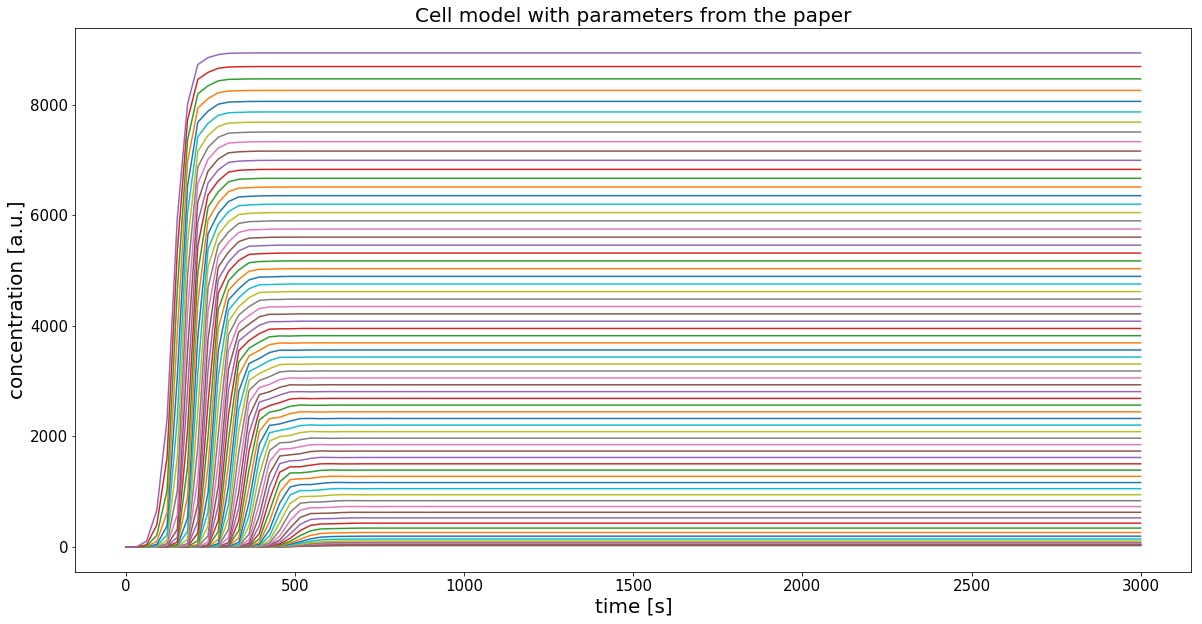

In [5]:
Kq = defaultParameters["Kq"]
prValues = []
valuesOneHundredTimeSteps, valuesLastTimeStep = [], []

for _ in np.linspace(0,152219,75):
    Kq = Kq - 2000
    m = WeisseBaseModel({'Kq':Kq})
    print(Kq)

    s = modelbase.Simulator(m)
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,100),weise_values);
    valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
    valuesLastTimeStep.append(changedValuesOverTimeArray[-1])
    #valuesFirstTimeStep.append(changedValuesOverTimeArray[1])

newT = s.getT()[:100]

# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Cell model with parameters from the paper', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('concentration [a.u.]', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

for i, data in enumerate(valuesOneHundredTimeSteps):
    plt.plot(newT,valuesOneHundredTimeSteps[i][:,10], label = 'pr')
#plt.legend(loc = 'lower right',prop = {'size': 20})


plt.draw_if_interactive()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (75,) and (39,)

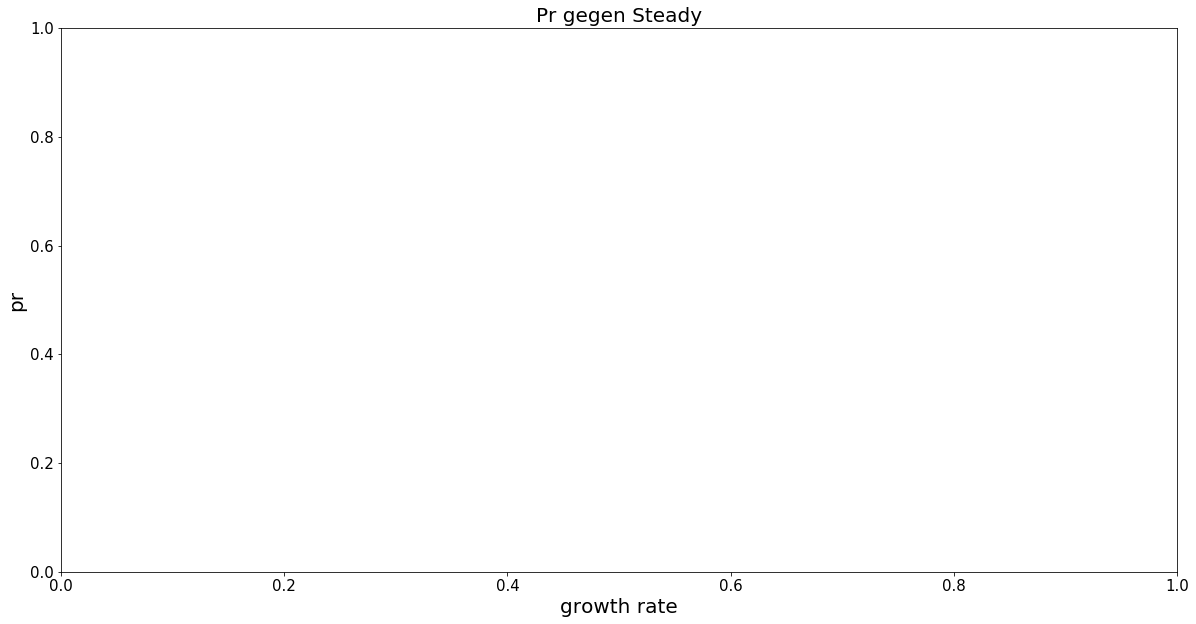

In [6]:
y = np.linspace(0,152219,75)
plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('growth rate', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

prtest = []
for n, datan in enumerate(valuesLastTimeStep[0]): 
    prtest.append([valuesLastTimeStep[i][n]for i, data in enumerate(valuesLastTimeStep)])

#prlast = []
#for i, data in enumerate(valuesLastTimeStep):
#    prlast.append(valuesLastTimeStep [i][10])
    
for i, data in enumerate(prtest):
    plt.plot(prtest[9],y, label = 'pr')


plt.draw_if_interactive()

plt.show()

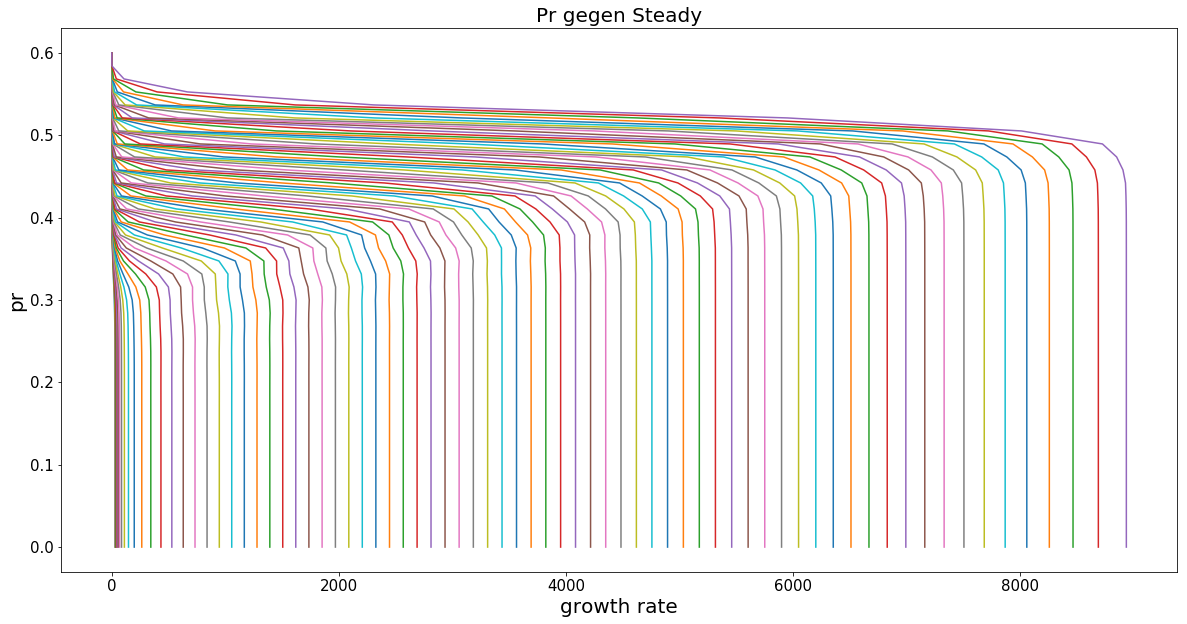

In [7]:
y = np.linspace(0,.6,39)

plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('growth rate', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)


pr = []
for n in range(0,100): 
    pr.append([valuesOneHundredTimeSteps[i][n][10]for i, data in enumerate(valuesOneHundredTimeSteps)])

    
plt.plot(pr[:39][::-1],y, label = 'pr')


plt.draw_if_interactive()
plt.show()

## Pr gegen steatdy

ValueError: x and y must have same first dimension, but have shapes (39,) and (75,)

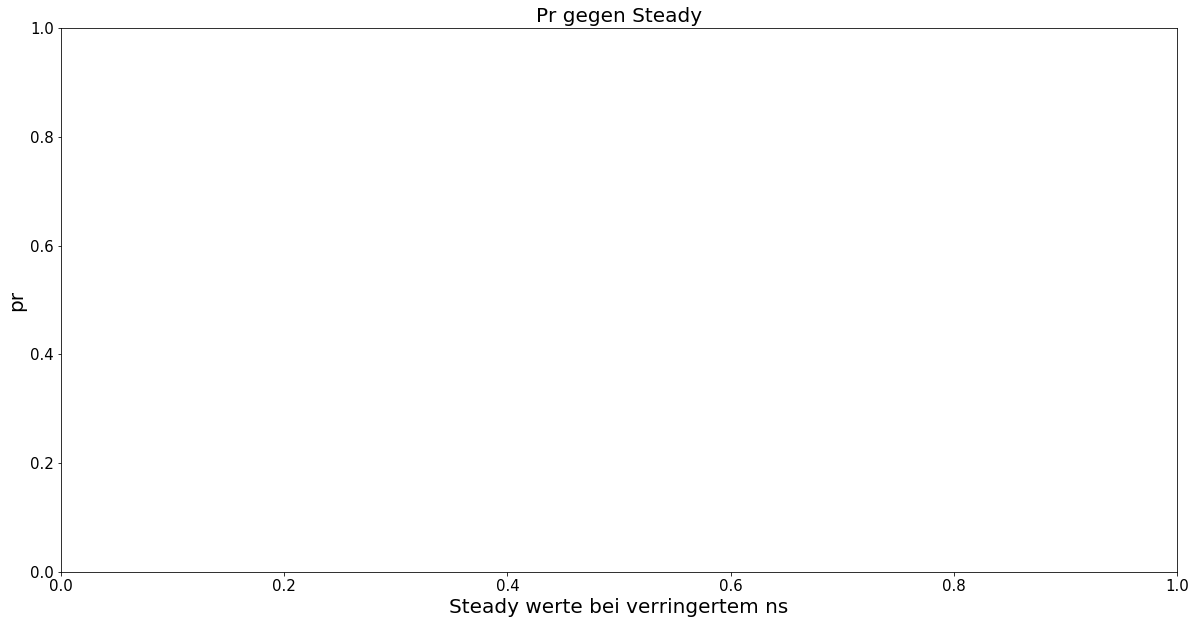

In [8]:
la = np.linspace(0,0.06,39)
values = []
for n in range(0,100): 
    values.append([valuesOneHundredTimeSteps[i][n][10] for i, data in enumerate(valuesOneHundredTimeSteps)])

#for i, data in enumerate(valuesOneHundredTimeSteps):
#    print(valuesOneHundredTimeSteps[i][n][10])
  
plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('Steady werte bei verringertem ns', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.xlim(0,0.9)
#plt.ylim()

for n1 in range(0,20,2):
    plt.plot(la,values[n1][::-1])
    
plt.show()


# Subplots zu allen cl

(0, 1000)

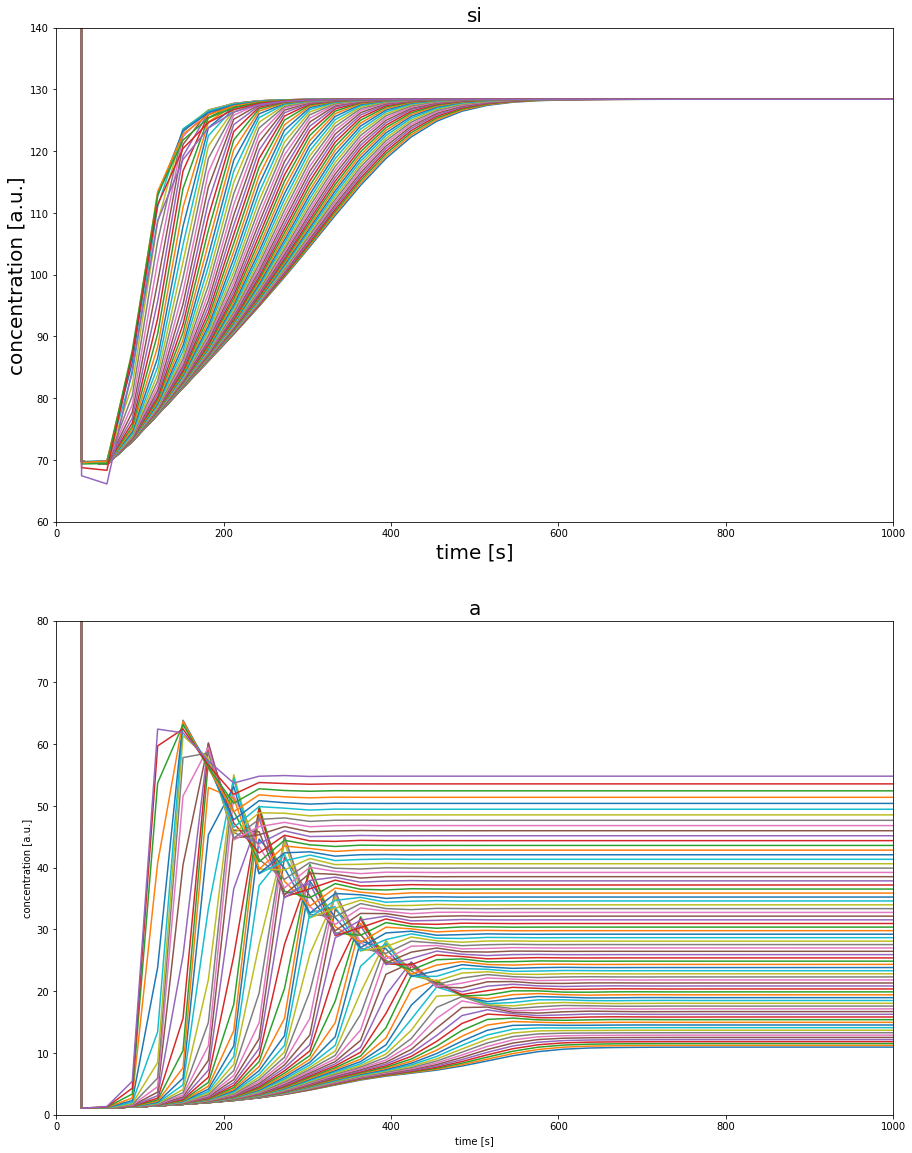

In [12]:
fig, Plotlist = plt.subplots(2,1,figsize=(15,20))
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,0])#, label = cl[0])

Plotlist[0].set_title('si', size ='20')
Plotlist[0].set_xlabel('time [s]',size ='20')
Plotlist[0].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)
#Plotlist[0].legend(loc = 'lower right')

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,1])
Plotlist[1].set_title('a',size ='20')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,80)
Plotlist[1].set_xlim(0,1000)
#Plotlist[1].legend(loc = 'upper right')



(0, 800)

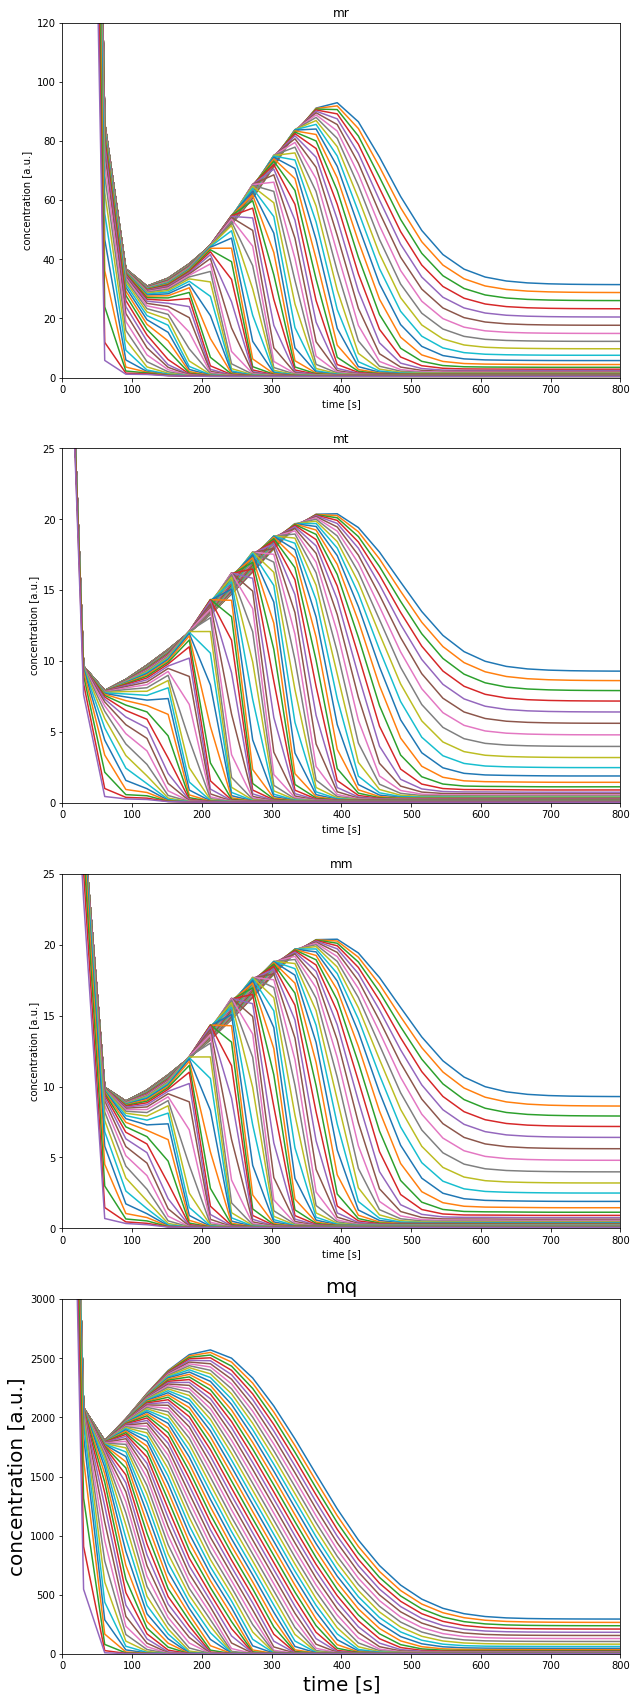

In [14]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,2])#,label = '{0} für einen ns von {1}'.format(cl[2],i[0]))
Plotlist[0].set_title('mr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].set_ylim(0,120)
Plotlist[0].set_xlim(0,800)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,3])
Plotlist[1].set_title('mt')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,25)
Plotlist[1].set_xlim(0,800)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,4])
Plotlist[2].set_title('mm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,25)
Plotlist[2].set_xlim(0,800)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,5])
Plotlist[3].set_title('mq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[3].set_ylim(0,3000)
Plotlist[3].set_xlim(0,800)



(0, 1000)

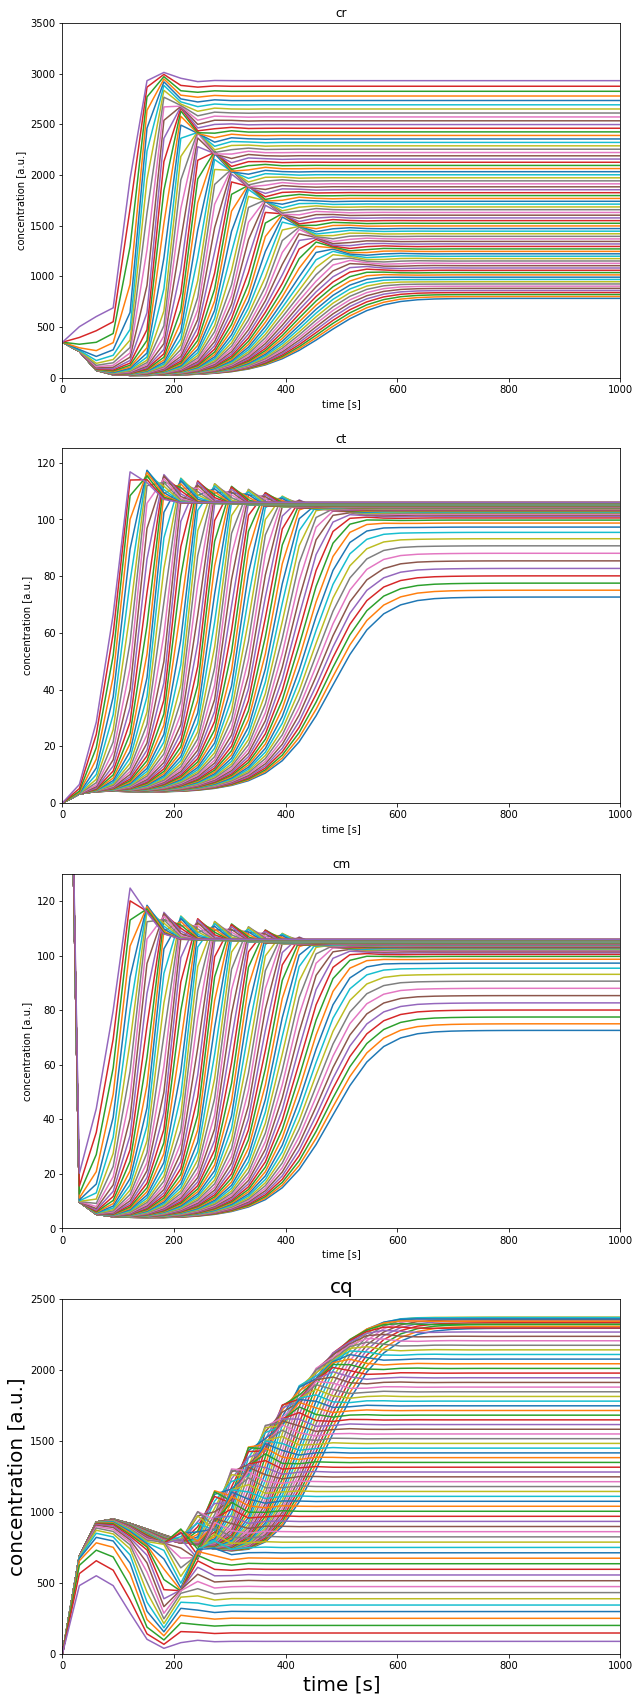

In [19]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,6])
Plotlist[0].set_title('cr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].set_ylim(0,3500)
Plotlist[0].set_xlim(0,1000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,7])
Plotlist[1].set_title('ct')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,125)
Plotlist[1].set_xlim(0,1000)

                                                       
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,8])
Plotlist[2].set_title('cm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,130)
Plotlist[2].set_xlim(0,1000)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,9])
Plotlist[3].set_title('cq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]',size ='20')
Plotlist[3].set_ylim(0,2500)
Plotlist[3].set_xlim(0,1000)


(0, 800)

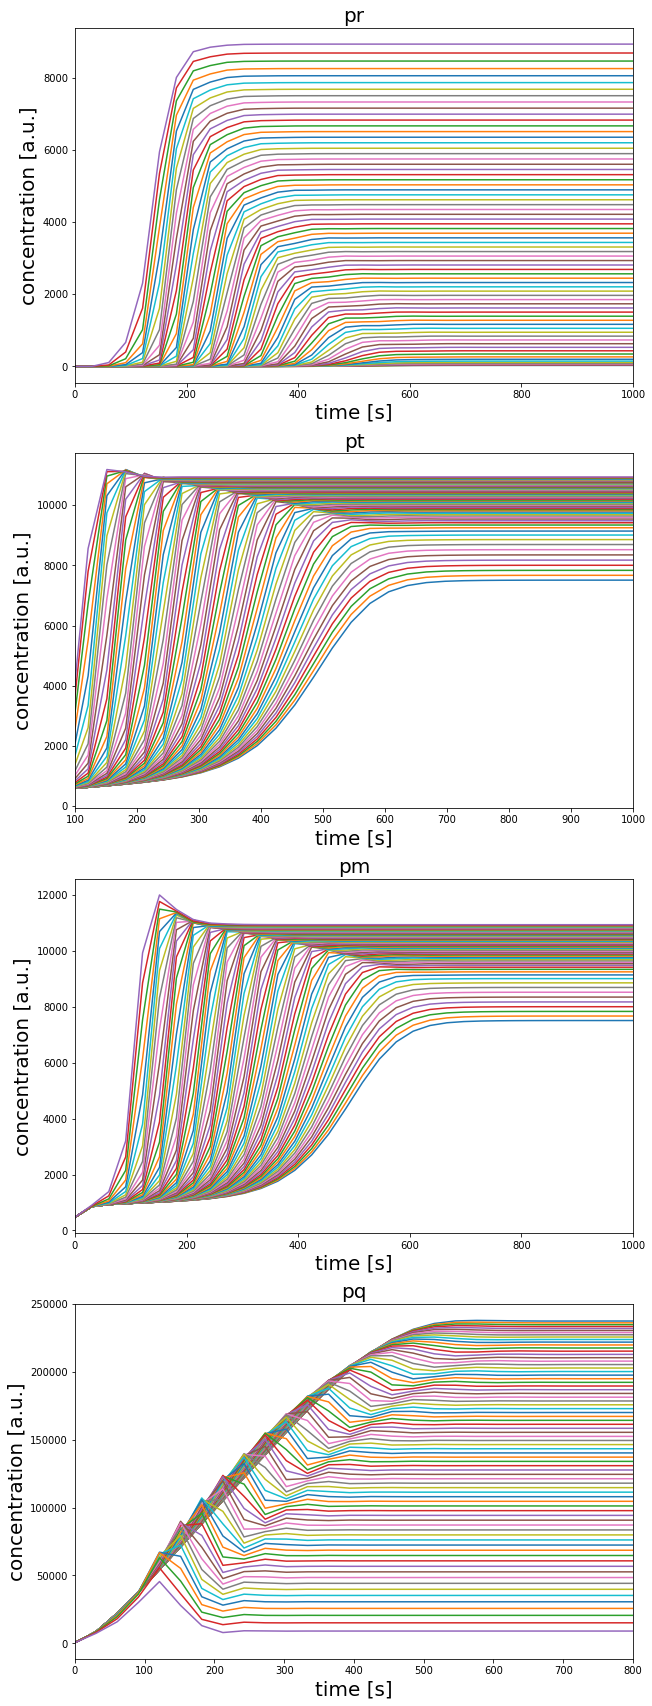

In [20]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
Plotlist = Plotlist.ravel()

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT, valuesOneHundredTimeSteps[i][:,10])

Plotlist[0].set_title('pr', size ='20')
Plotlist[0].set_xlabel('time [s]', size ='20')
Plotlist[0].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[0].set_ylim(0,2000)
Plotlist[0].set_xlim(0,1000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,11])
Plotlist[1].set_title('pt', size ='20')
Plotlist[1].set_xlabel('time [s]', size ='20')
Plotlist[1].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[1].set_ylim(0,2000)
Plotlist[1].set_xlim(100,1000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,12])
Plotlist[2].set_title('pm', size ='20')
Plotlist[2].set_xlabel('time [s]', size ='20')
Plotlist[2].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[2].set_ylim(0,2000)
Plotlist[2].set_xlim(0,1000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,13])
Plotlist[3].set_title('pq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]', size ='20')
#Plotlist[3].set_ylim(0,5000)
Plotlist[3].set_xlim(0,800)
